# UIDAI Data Hackathon 2026

## Notebook 02
Aadhaar Enrolment Inequality Analysis

### Objective
To identify regional, age-based, and demographic inequalities in Aadhaar enrolment across India using cleaned UIDAI enrolment data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")


In [2]:
# Load cleaned enrolment data
enrol_df = pd.read_csv("../data/enrolment_cleaned.csv")

print("Enrolment Data Shape:", enrol_df.shape)
enrol_df.head()


Enrolment Data Shape: (1006029, 7)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21


In [3]:
# Create total enrolment column
enrol_df['total_enrolment'] = (
    enrol_df['age_0_5'] +
    enrol_df['age_5_17'] +
    enrol_df['age_18_greater']
)

enrol_df[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']].head()


,age_0_5,age_5_17,age_18_greater,total_enrolment
0,11,61,37,109
1,14,33,39,86
2,29,82,12,123
3,62,29,15,106
4,14,16,21,51


In [4]:
# State-wise total enrolment
state_enrolment = (
    enrol_df
    .groupby('state')['total_enrolment']
    .sum()
    .reset_index()
    .sort_values(by='total_enrolment', ascending=False)
)

state_enrolment.head()


,state,total_enrolment
43,Uttar Pradesh,1018629
6,Bihar,609585
26,Madhya Pradesh,493970
47,West Bengal,375308
27,Maharashtra,369139


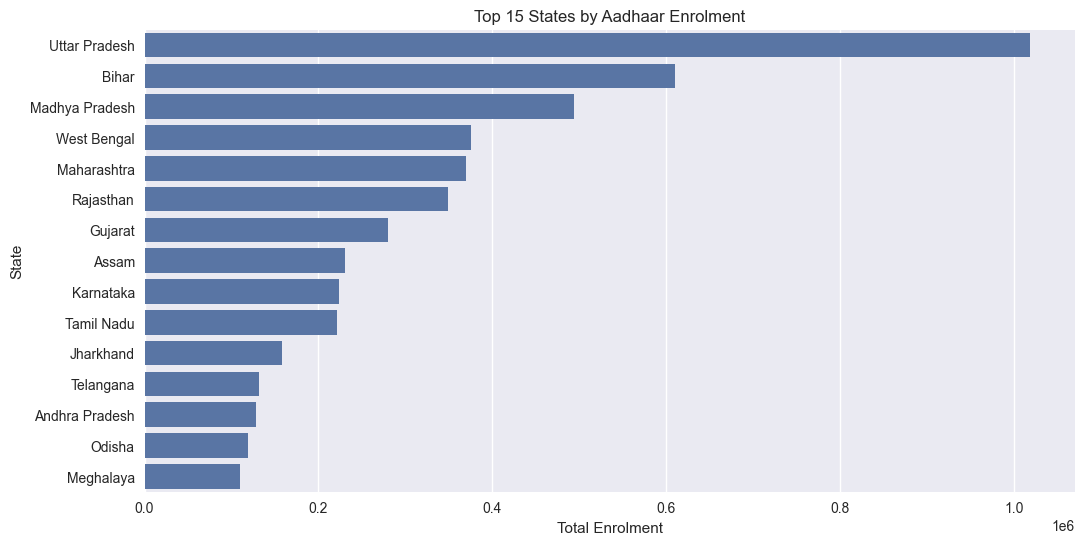

In [5]:
# Plot top 15 states by enrolment
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_enrolment.head(15),
    x='total_enrolment',
    y='state'
)
plt.title("Top 15 States by Aadhaar Enrolment")
plt.xlabel("Total Enrolment")
plt.ylabel("State")
plt.show()


In [6]:
# Bottom 10 states by enrolment
low_enrolment_states = state_enrolment.tail(10)
low_enrolment_states


,state,total_enrolment
25,Lakshadweep,203
11,Dadra And Nagar Haveli And Daman And Diu,173
19,Jammu & Kashmir,155
13,Daman And Diu,120
1,Andaman & Nicobar Islands,114
9,Dadra & Nagar Haveli,25
12,Daman & Diu,21
45,West Bengal,15
46,West Bangal,10
48,Westbengal,7


In [7]:
# Sum enrolment by age group
age_summary = enrol_df[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
age_summary.columns = ['age_group', 'total_enrolment']
age_summary


,age_group,total_enrolment
0,age_0_5,3546965
1,age_5_17,1720384
2,age_18_greater,168353


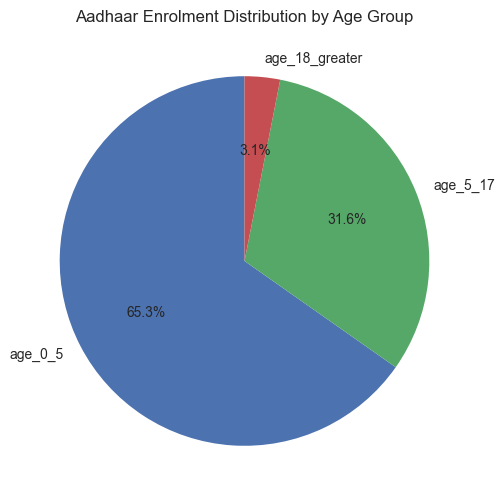

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(
    age_summary['total_enrolment'],
    labels=age_summary['age_group'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Aadhaar Enrolment Distribution by Age Group")
plt.show()


In [9]:
# District-wise total enrolment
district_enrolment = (
    enrol_df
    .groupby(['state', 'district'])['total_enrolment']
    .sum()
    .reset_index()
    .sort_values(by='total_enrolment', ascending=False)
)

district_enrolment.head(10)


,state,district,total_enrolment
567,Maharashtra,Thane,43688
159,Bihar,Sitamarhi,42232
898,Uttar Pradesh,Bahraich,39338
1026,West Bengal,Murshidabad,35911
1038,West Bengal,South 24 Parganas,33542
558,Maharashtra,Pune,31763
759,Rajasthan,Jaipur,31146
393,Karnataka,Bengaluru,30980
971,Uttar Pradesh,Sitapur,30854
163,Bihar,West Champaran,30438


In [10]:
# Bottom 20 districts by enrolment
low_districts = district_enrolment.tail(20)
low_districts



,state,district,total_enrolment
687,Orissa,Khorda,2
855,Telangana,Medchal?Malkajgiri,2
694,Orissa,Nuapada,2
830,Tamil Nadu,Tuticorin,2
435,Karnataka,Udupi *,2
1042,West Bengal,West Medinipur,2
897,Uttar Pradesh,Bagpat,1
773,Rajasthan,Salumbar,1
808,Tamil Nadu,Namakkal *,1
739,Rajasthan,Balotra,1


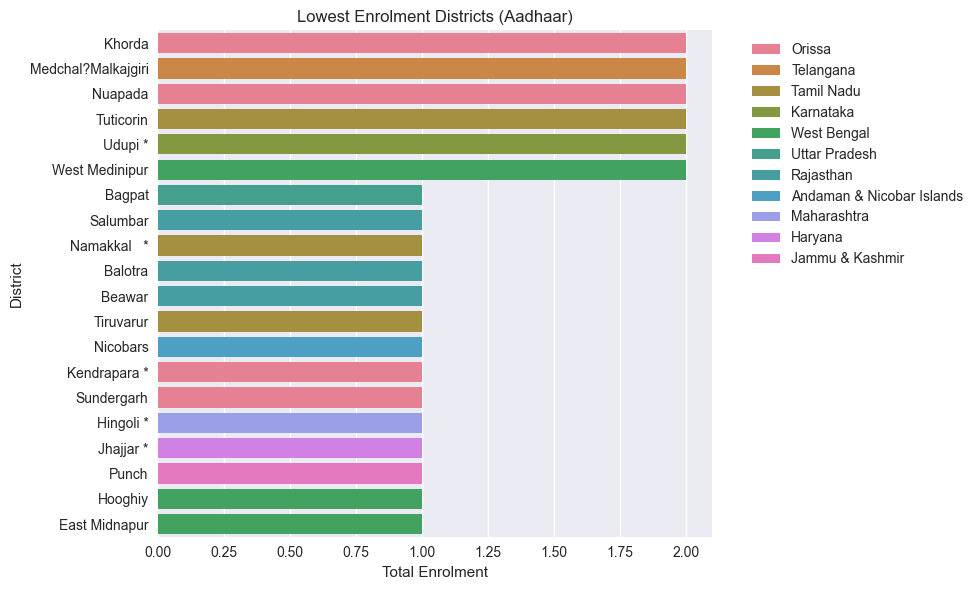

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=low_districts,
    x='total_enrolment',
    y='district',
    hue='state'
)
plt.title("Lowest Enrolment Districts (Aadhaar)")
plt.xlabel("Total Enrolment")
plt.ylabel("District")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
# Save key outputs
state_enrolment.to_csv("../final_report/state_enrolment_summary.csv", index=False)
district_enrolment.to_csv("../final_report/district_enrolment_summary.csv", index=False)

print("Summary tables saved for final report")


Summary tables saved for final report
